<a href="https://colab.research.google.com/github/ZineddineLch/pytorch_repo/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

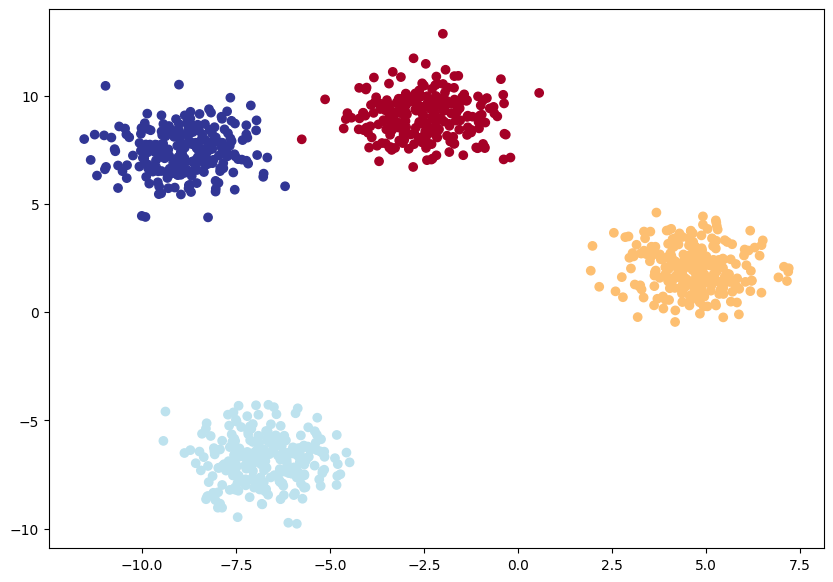

In [48]:
import torch
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2,centers=4,random_state=42)

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.long) # Changed from torch.float to torch.long
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [49]:
##building a multiclass model
from torch import nn
class multiclass_classification_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(

                                          nn.Linear(in_features=2,out_features=8),
                                          nn.Linear(in_features=8,out_features=4),
                                          nn.Linear(in_features=4,out_features=4),
                                          # Changed out_features from 1 to 4 to match the number of classes

    )
  def forward(self,x):
    return self.linear_layer_stack(x)
model_4= multiclass_classification_model()
model_4
X_train.shape
y_train.shape

torch.Size([800])

In [50]:
#create an optimizer and a losse function
# Create loss and optimizer
# PROBLEM: nn.CrossEntropyLoss expects target labels (like y_train) to be of type torch.long, not torch.float.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [51]:
##accurancy
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [52]:
epochs = 200

for epoch in range(epochs):
    # ---- Training ----
    model_4.train()

    # 1. Forward pass
    y_pred = model_4(X_train)

    # 2. Compute loss (use raw logits, not argmax)
    loss_values = loss_fn(y_pred, y_train)

    # 3. Compute accuracy
    y_pred_labels = torch.softmax(y_pred, dim=1).argmax(dim=1)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred_labels)

    # 4. Backpropagation
    optimizer.zero_grad()
    loss_values.backward()
    optimizer.step()

    # ---- Testing ----
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # ---- Print progress ----
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss_values:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 2.35113, Acc: 22.38% | Test Loss: 1.74480, Test Acc: 20.50%
Epoch: 10 | Loss: 0.17622, Acc: 99.88% | Test Loss: 0.15337, Test Acc: 100.00%
Epoch: 20 | Loss: 0.06304, Acc: 99.88% | Test Loss: 0.05726, Test Acc: 100.00%
Epoch: 30 | Loss: 0.03587, Acc: 99.88% | Test Loss: 0.03245, Test Acc: 100.00%
Epoch: 40 | Loss: 0.02472, Acc: 99.88% | Test Loss: 0.02201, Test Acc: 100.00%
Epoch: 50 | Loss: 0.01884, Acc: 99.88% | Test Loss: 0.01645, Test Acc: 100.00%
Epoch: 60 | Loss: 0.01525, Acc: 99.88% | Test Loss: 0.01305, Test Acc: 100.00%
Epoch: 70 | Loss: 0.01286, Acc: 99.88% | Test Loss: 0.01078, Test Acc: 100.00%
Epoch: 80 | Loss: 0.01116, Acc: 99.88% | Test Loss: 0.00917, Test Acc: 100.00%
Epoch: 90 | Loss: 0.00989, Acc: 99.88% | Test Loss: 0.00798, Test Acc: 100.00%
Epoch: 100 | Loss: 0.00891, Acc: 99.88% | Test Loss: 0.00705, Test Acc: 100.00%
Epoch: 110 | Loss: 0.00813, Acc: 99.88% | Test Loss: 0.00633, Test Acc: 100.00%
Epoch: 120 | Loss: 0.00750, Acc: 99.88% | Test Loss:

In [44]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_test)
y_logits

tensor([[1.1489e+01, 1.8022e+01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0736e+01, 7.9190e-01],
        [8.1673e+00, 1.4366e+01, 0.0000e+00, 0.0000e+00],
        [1.0204e+01, 4.5374e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0587e+01, 8.8523e-01],
        [7.4640e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.1564e+01, 7.1223e-01],
        [8.3656e+00, 1.4333e+00, 0.0000e+00, 0.0000e+00],
        [5.9706e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.2615e+01, 2.0259e+01, 0.0000e+00, 0.0000e+00],
        [9.6328e+00, 3.2113e+00, 0.0000e+00, 0.0000e+00],
        [8.6590e+00, 7.0377e-01, 0.0000e+00, 0.0000e+00],
        [9.5294e+00, 1.6983e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.000

In [45]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


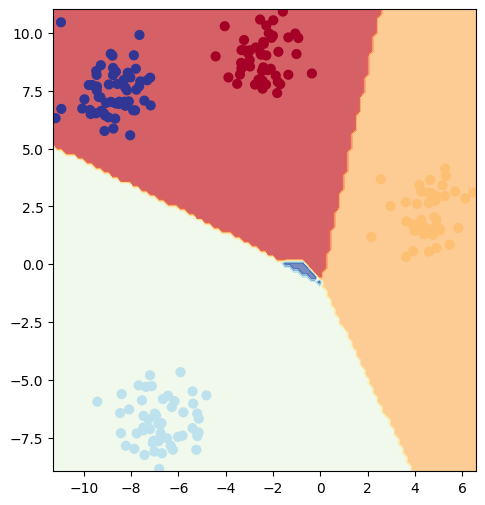

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_4,X_test,y_test)